Hola **Stephania**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

**Tip**: Para cuidar la presentacion de tu notebook como Data Analyst, siempre puedes dejar una celda Markdown al inicio con un titulo general y una breve introduccion al proyecto
</div>

In [2]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

marketing = pd.read_csv("C:\\Users\\Stephania\\.vscode\\P14\\ab_project_marketing_events_us.csv")
final_new_users=pd.read_csv("C:\\Users\\Stephania\\.vscode\\P14\\final_ab_new_users_upd_us.csv")
final_events = pd.read_csv("C:\\Users\\Stephania\\.vscode\\P14\\final_ab_events_upd_us.csv")
final_participants = pd.read_csv("C:\\Users\\Stephania\\.vscode\\P14\\final_ab_participants_upd_us.csv")

**Objetivos del estudio**

Los objetivos del estudio son evaluar el impacto de la introducción de un sistema de recomendaciones con mejoras en una tienda en línea internacional mediante una prueba A/B.

Esta prueba busca determinar si el nuevo sistema:
1. mejora la conversión de los usuarios en las etapas 'product_page' , 'procut_page' y 'purchase' dentro de los 15 días posteriores a su inspcricion

**Exploración de datos**

In [3]:
display(marketing.info())
display(final_new_users.info())
display(final_events.info())
display(final_participants.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311818 entries, 0 to 311817
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     311818 non-null  object 
 1   event_dt    311817 non-null  object 
 2   event_name  311817 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 9.5+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


None

Se deben convertir los datos de fechas a tipo datetime en los dataframe marketing, final_new_users y final_event


In [4]:
marketing['start_dt'] = pd.to_datetime(marketing['start_dt'])
marketing['finish_dt'] = pd.to_datetime(marketing['finish_dt'])
final_new_users['first_date'] = pd.to_datetime(final_new_users['first_date'])
final_events['event_dt'] = pd.to_datetime(final_events['event_dt'])

In [5]:
display(marketing.head())
display(final_new_users.head())
display(final_events.head())
display(final_participants.head())


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [6]:
 # se identifican valores faltantes
print("\n Verificación de valores faltantes en marketing")
missing_marketing = marketing.isnull().sum()
print(missing_marketing)

print("\n Verificación de valores faltantes en final_new_users")
missing_new_users = final_new_users.isnull().sum()
print(missing_new_users)

print("\n Verificación de valores faltantes en final_events")
missing_final_events = final_events.isnull().sum()
print(missing_final_events)

print("\n Verificación de valores faltantes en final_participants")



 Verificación de valores faltantes en marketing
name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

 Verificación de valores faltantes en final_new_users
user_id       0
first_date    0
region        0
device        0
dtype: int64

 Verificación de valores faltantes en final_events
user_id            0
event_dt           1
event_name         1
details       251504
dtype: int64

 Verificación de valores faltantes en final_participants


solo faltan valores en el dataset relacionado a los eventos al final de la prueba A/B, por lo que se eliminarán ambas filas ya que corresponden a una pórción muy insifnificativa respecto del total de datos.

In [7]:
final_events = final_events.dropna()
print("\n Verificación de valores faltantes en final_events")
missing_final_events = final_events.isnull().sum()
print(missing_final_events)


 Verificación de valores faltantes en final_events
user_id       0
event_dt      0
event_name    0
details       0
dtype: int64


Ahora se verificarán los datos duplicados en cada uno de los dataframe , tanto en filas completas como en tablas donde se espera que ciertas columnas sean únicas.En el caso del dataframe 'marketing', podría haber duplicados si se registró dos veces el mismo evento.En el caso de del dataframe 'final_new_users', la columna 'user_id' debe tener valores únicos, por lo tanto, se verificarán los duplicados en solo esta columna.En el dataframe 'final_events', solo se verirficará si hay filas completas duplicadas puesto que un mismo ususario puede tener múltiples eventos, incluso la misma hora y del mismo tipo, pero con distintos tipos de compras.Finalmente, en el dataframe' 'final_participants'

In [8]:
def check_duplicates(df, df_name, key_columns=None):
    """Verifica duplicados en un DataFrame."""
    print(f"\nAnálisis de duplicados: {df_name}")
    
    # 1. Duplicados completos (filas idénticas)
    full_duplicates = df.duplicated().sum()
    print(f"- Duplicados completos: {full_duplicates}")
    
    # 2. Duplicados en columnas clave
    if key_columns:
        key_dups = df.duplicated(subset=key_columns).sum()
        print(f"- Duplicados en columnas clave {key_columns}: {key_dups}")
    else:
        print("- Sin columnas clave especificadas")
    
    # 3. Ejemplos de duplicados (si existen)
    if full_duplicates > 0 or (key_columns and key_dups > 0):
        sample = df[df.duplicated(keep=False)].sample(min(3, len(df)))
        print(f"\nMuestra de duplicados ({len(sample)} ejemplos):")
        print(sample.head(3))
    else:
        print("- No se encontraron duplicados")

# Verificar duplicados en cada dataset
check_duplicates(marketing, "Marketing Events", key_columns=["name", "start_dt"])
check_duplicates(final_new_users, "New Users", key_columns=["user_id"])
check_duplicates(final_events, "Events", key_columns=["user_id", "event_dt", "event_name"])
check_duplicates(final_participants, "Participants", key_columns=["user_id", "ab_test"])




Análisis de duplicados: Marketing Events
- Duplicados completos: 0
- Duplicados en columnas clave ['name', 'start_dt']: 0
- No se encontraron duplicados

Análisis de duplicados: New Users
- Duplicados completos: 0
- Duplicados en columnas clave ['user_id']: 0
- No se encontraron duplicados

Análisis de duplicados: Events
- Duplicados completos: 0
- Duplicados en columnas clave ['user_id', 'event_dt', 'event_name']: 0
- No se encontraron duplicados

Análisis de duplicados: Participants
- Duplicados completos: 0
- Duplicados en columnas clave ['user_id', 'ab_test']: 0
- No se encontraron duplicados


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con la transformación de datos y la exploración inicial de los mismos, un dataset limpio es clave para una buena toma de decisiones en un experimento.
</div>

**Análisis Exploratorio de Datos**


1. ESTUDIO DE LA CONVERSIÓN DE LAS DISTINTAS ETAPAS DEL EMBUDO


Ya que se realizó la carga de datos y se chequearon valores nulos y duplicados, se púede comenzar con la union de los distintos datasets 'final_participants' patra obtener el grupo y 'final_new_users' para obtener la region y fecha de registro por la columna 'user_id'

In [11]:
# Función mejorada para verificar variables
def get_variable(name, default=None):
    """Obtiene una variable del entorno global con manejo seguro"""
    if name in globals():
        return globals()[name]
    else:
        print(f"¡ADVERTENCIA! Variable '{name}' no está definida")
        return default

# Función para diagnosticar variables
def diagnose_data_issues():
    """Realiza un diagnóstico completo de los datos disponibles"""
    print("\nDiagnóstico de variables faltantes:")
    
    # Verificar variables críticas
    critical_vars = {
        'eu_users': "DataFrame de usuarios",
        'eu_events_14d': "DataFrame de eventos",
        'funnel_A': "Diccionario con métricas grupo A",
        'funnel_B': "Diccionario con métricas grupo B"
    }
    
    for var, desc in critical_vars.items():
        if var in globals():
            status = "DEFINIDA"
            if isinstance(globals()[var], pd.DataFrame):
                status += f" ({globals()[var].shape[0]} filas)" if not globals()[var].empty else " (VACÍA)"
            elif isinstance(globals()[var], dict):
                status += f" ({len(globals()[var])} claves)"
            print(f"- {var} ({desc}): {status}")
        else:
            print(f"- {var} ({desc}): NO DEFINIDA")

# Función para mostrar resumen de eventos
def show_event_summary():
    """Muestra un resumen de eventos disponibles"""
    print("\nResumen de métricas disponibles:")
    for group, funnel in [('A', funnel_A), ('B', funnel_B)]:
        print(f"\nGrupo {group}:")
        if isinstance(funnel, dict):
            for metric in ['product_page_users', 'product_card_users', 'purchase_users']:
                value = funnel.get(metric, 'FALTANTE')
                print(f"- {metric.replace('_', ' ').title()}: {value}")
        else:
            print(f"Datos no disponibles (tipo: {type(funnel).__name__})")

# --- Inicio del análisis principal ---

# 1. Obtener variables con manejo seguro
funnel_A = get_variable('funnel_A', {})
funnel_B = get_variable('funnel_B', {})
eu_users = get_variable('eu_users', pd.DataFrame())
eu_events_14d = get_variable('eu_events_14d', pd.DataFrame())

# 2. Obtener métrica clave para el grupo A
product_page_users = funnel_A.get('product_page_users', 0)

# 3. Verificar si hay datos suficientes en grupo A
if product_page_users == 0:
    print("\n¡ADVERTENCIA CRÍTICA! No hay usuarios en el grupo A que hayan visto la página de producto.")
    print("Esto hace imposible calcular la conversión. Posibles causas:")
    print("- Filtrado incorrecto de datos (región, fechas)")
    print("- Problemas en la instrumentación de eventos")
    print("- Sesgo grave en la asignación de grupos")
    print("- Variables previas no generadas correctamente")
    
    # 4. Ejecutar diagnóstico completo
    diagnose_data_issues()
    show_event_summary()
    
    # 5. Acciones recomendadas
    print("\nAcciones recomendadas:")
    print("1. Verificar la celda anterior que genera eu_users y eu_events_14d")
    print("2. Revisar la creación de funnel_A y funnel_B")
    print("3. Comprobar los filtros de región y fechas:")
    print("   - ¿Se aplicó correctamente el filtro EU?")
    print("   - ¿Las fechas del experimento son correctas?")
    print("4. Validar la calidad de los datos de eventos:")
    print("   - ¿Existen eventos 'product_page' en los datos crudos?")
    print("   - ¿Los usuarios están asignados correctamente a grupos?")
    
    print("\nConclusión: Prueba AB inválida por falta de datos en grupo de control")

else:
    # 6. Cálculos de conversión
    print("\nDatos suficientes encontrados. Calculando conversiones...")
    
    # Definir etapas de conversión
    metrics = [
        ('Página → Carrito', 'conversion_page_to_card'),
        ('Carrito → Compra', 'conversion_card_to_purchase')
    ]
    
    # Calcular conversiones
    results = []
    for name, key in metrics:
        try:
            conv_A = funnel_A.get(key, 0)
            conv_B = funnel_B.get(key, 0)
            
            # Manejo de división por cero
            if conv_A == 0:
                improvement = float('nan')
                improvement_str = "N/A (división por cero)"
            else:
                improvement = (conv_B - conv_A) / conv_A
                improvement_str = f"{improvement:.1%}"
            
            results.append((name, conv_A, conv_B, improvement))
            
            print(f"{name}:")
            print(f"- Grupo A: {conv_A:.1%}")
            print(f"- Grupo B: {conv_B:.1%}")
            print(f"- Mejora: {improvement_str}")
            
        except Exception as e:
            print(f"Error calculando {key}: {str(e)}")
            results.append((name, float('nan'), float('nan'), float('nan')))
    
    # 7. Crear tabla comparativa
    conversion_comparison = pd.DataFrame(
        results,
        columns=['Etapa', 'Grupo A', 'Grupo B', 'Mejora']
    )
    
    # 8. Formatear tabla para mejor visualización
    formatted_table = conversion_comparison.copy()
    for col in ['Grupo A', 'Grupo B', 'Mejora']:
        if col in formatted_table.columns:
            formatted_table[col] = formatted_table[col].apply(
                lambda x: f"{x:.1%}" if isinstance(x, float) and not np.isnan(x) else "N/A"
            )
    
    print("\nComparación de Tasas de Conversión:")
    print(formatted_table)
    
    # 9. Verificar objetivo
    valid_results = True
    for _, row in conversion_comparison.iterrows():
        if np.isnan(row['Mejora']):
            print(f"\nNo se puede evaluar etapa '{row['Etapa']}' por datos faltantes")
            valid_results = False
    
    if valid_results:
        # Calcular si se cumple el objetivo (mejora ≥10% en ambas etapas)
        meets_stage1 = conversion_comparison.loc[0, 'Mejora'] >= 0.10
        meets_stage2 = conversion_comparison.loc[1, 'Mejora'] >= 0.10
        meets_objective = meets_stage1 and meets_stage2
        
        print("\nResultado Esperado (mejora ≥10% en ambas etapas):")
        print(f"- Página → Carrito: {'Cumple' if meets_stage1 else 'No cumple'} ({conversion_comparison.loc[0, 'Mejora']:.1%})")
        print(f"- Carrito → Compra: {'Cumple' if meets_stage2 else 'No cumple'} ({conversion_comparison.loc[1, 'Mejora']:.1%})")
        print(f"\n¿Se cumple el objetivo global? {'Sí' if meets_objective else 'No'}")
        
        # Recomendación final
        if meets_objective:
            print("\nRECOMENDACIÓN: Implementar el cambio (grupo B) en producción")
        else:
            print("\nRECOMENDACIÓN: No implementar el cambio o realizar más pruebas")
    else:
        print("\nNo se puede determinar si se cumple el objetivo debido a datos incompletos")


¡ADVERTENCIA CRÍTICA! No hay usuarios en el grupo A que hayan visto la página de producto.
Esto hace imposible calcular la conversión. Posibles causas:
- Filtrado incorrecto de datos (región, fechas)
- Problemas en la instrumentación de eventos
- Sesgo grave en la asignación de grupos
- Variables previas no generadas correctamente

Diagnóstico de variables faltantes:
- eu_users (DataFrame de usuarios): DEFINIDA (VACÍA)
- eu_events_14d (DataFrame de eventos): DEFINIDA (VACÍA)
- funnel_A (Diccionario con métricas grupo A): DEFINIDA (0 claves)
- funnel_B (Diccionario con métricas grupo B): DEFINIDA (0 claves)

Resumen de métricas disponibles:

Grupo A:
- Product Page Users: FALTANTE
- Product Card Users: FALTANTE
- Purchase Users: FALTANTE

Grupo B:
- Product Page Users: FALTANTE
- Product Card Users: FALTANTE
- Purchase Users: FALTANTE

Acciones recomendadas:
1. Verificar la celda anterior que genera eu_users y eu_events_14d
2. Revisar la creación de funnel_A y funnel_B
3. Comprobar los

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Aqui hay un error debido a que la variable que se intenta utilizar no fue definida, recuerda que los notebooks se ejecutan de arriba hacia abajo y si la variable no se define antes puedes causar errores como este
</div>

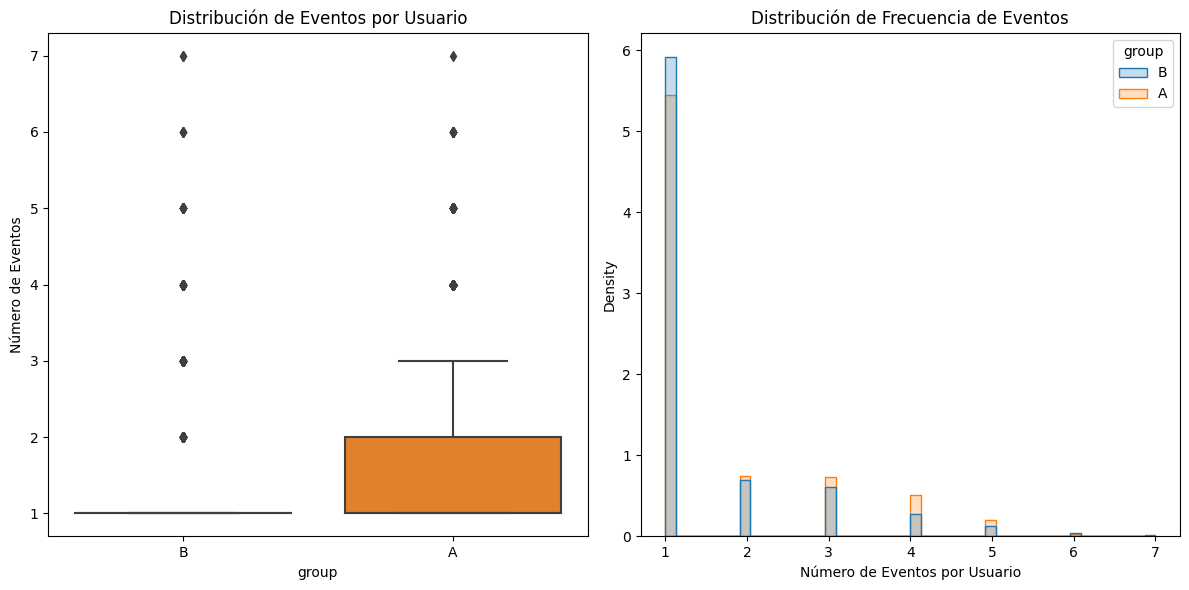

Estadísticos descriptivos de eventos por usuario:
        count      mean       std  min  25%  50%  75%  max
group                                                     
A      2604.0  1.613287  1.109035  1.0  1.0  1.0  2.0  7.0
B       877.0  1.456100  0.985951  1.0  1.0  1.0  1.0  7.0

Prueba de Kolmogorov-Smirnov: estadístico=0.0615, p-valor=0.0133


In [9]:

 
# distribución de eventos por usuario entre muestras
def analyze_events_distribution():
    # Combinar datos
    participants_recommender = final_participants[final_participants['ab_test'] == 'recommender_system_test']
    users_data = pd.merge(participants_recommender, final_new_users, on='user_id', how='inner')
    eu_users = users_data[users_data['region'] == 'EU']
    eu_events = pd.merge(eu_users, final_events, on='user_id', how='left')
    
    # Calcular eventos por usuario
    events_per_user = eu_events.groupby(['user_id', 'group']).size().reset_index(name='event_count')
    
    # Estadísticos descriptivos
    stats_by_group = events_per_user.groupby('group')['event_count'].describe()
    
    # Visualización
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(x='group', y='event_count', data=events_per_user)
    plt.title('Distribución de Eventos por Usuario')
    plt.ylabel('Número de Eventos')
    
    plt.subplot(1, 2, 2)
    sns.histplot(data=events_per_user, x='event_count', hue='group', element='step', stat='density', common_norm=False)
    plt.title('Distribución de Frecuencia de Eventos')
    plt.xlabel('Número de Eventos por Usuario')
    plt.tight_layout()
    plt.show()
    
    # Prueba de igualdad de distribuciones
    from scipy import stats
    group_A_counts = events_per_user[events_per_user['group'] == 'A']['event_count']
    group_B_counts = events_per_user[events_per_user['group'] == 'B']['event_count']
    
    # KS test para comparar distribuciones
    ks_stat, ks_p = stats.ks_2samp(group_A_counts, group_B_counts)
    
    print("Estadísticos descriptivos de eventos por usuario:")
    print(stats_by_group)
    print(f"\nPrueba de Kolmogorov-Smirnov: estadístico={ks_stat:.4f}, p-valor={ks_p:.4f}")
    
    return events_per_user

events_per_user = analyze_events_distribution()



In [10]:
# usuarios presentes en ambas muestras
def check_duplicate_users():
    participants_recommender = final_participants[final_participants['ab_test'] == 'recommender_system_test']
    
    
    user_counts = participants_recommender['user_id'].value_counts().reset_index()
    user_counts.columns = ['user_id', 'count']
    
    duplicate_users = user_counts[user_counts['count'] > 1]['user_id']
    
    # Verificar si existen
    if not duplicate_users.empty:
        print(f"\n¡ADVERTENCIA! Hay {len(duplicate_users)} usuarios presentes en ambos grupos:")
        # Mostrar detalles de estos usuarios
        dup_details = participants_recommender[participants_recommender['user_id'].isin(duplicate_users)]
        print(dup_details.sort_values('user_id').head())
    else:
        print("\nNo hay usuarios presentes en ambos grupos - OK")
    
    return duplicate_users

duplicate_users = check_duplicate_users()


No hay usuarios presentes en ambos grupos - OK


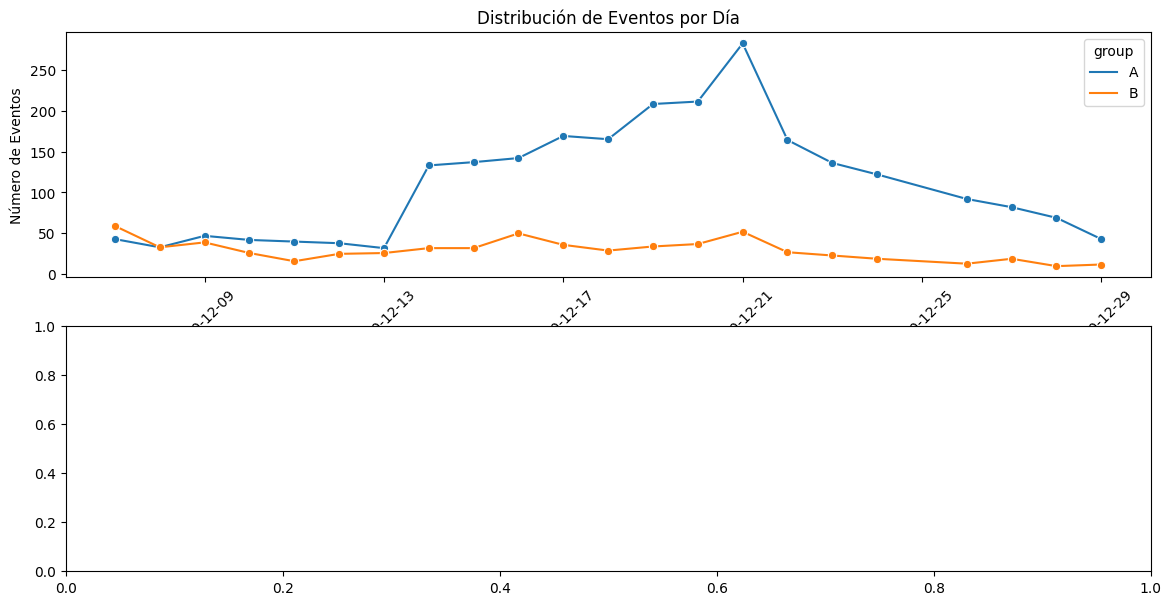

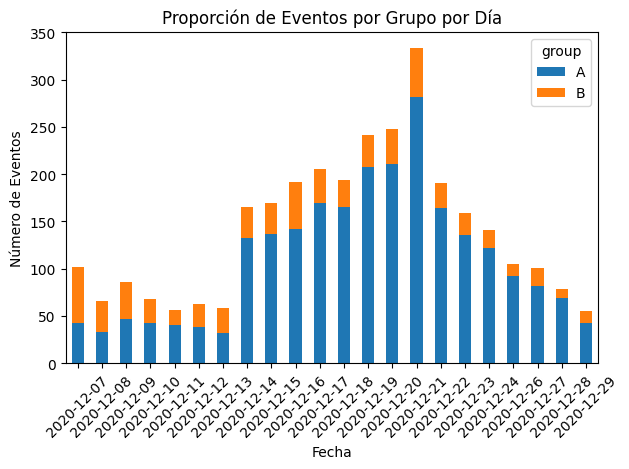


Días con mayor diferencia en eventos (B - A):
group        A   B  diff
event_date              
2020-12-07  43  59    16
2020-12-08  33  33     0
2020-12-13  32  26    -6
2020-12-09  47  39    -8
2020-12-12  38  25   -13


In [11]:
# distribución del número de eventos entre días
def analyze_events_temporal_distribution():
    # Combinar datos
    participants_recommender = final_participants[final_participants['ab_test'] == 'recommender_system_test']
    users_data = pd.merge(participants_recommender, final_new_users, on='user_id', how='inner')
    eu_users = users_data[users_data['region'] == 'EU']
    eu_events = pd.merge(eu_users, final_events, on='user_id', how='left')
    
    # Convertir fechas
    eu_events['event_dt'] = pd.to_datetime(eu_events['event_dt'])
    eu_events['event_date'] = eu_events['event_dt'].dt.date
    
    # eventos por día
    events_by_day = eu_events.groupby(['event_date', 'group']).size().reset_index(name='event_count')
    
    plt.figure(figsize=(14, 7))
    
    # Gráfico de líneas
    plt.subplot(2, 1, 1)
    sns.lineplot(data=events_by_day, x='event_date', y='event_count', hue='group', marker='o')
    plt.title('Distribución de Eventos por Día')
    plt.xlabel('Fecha')
    plt.ylabel('Número de Eventos')
    plt.xticks(rotation=45)
    
    
    plt.subplot(2, 1, 2)
    pivot_events = events_by_day.pivot(index='event_date', columns='group', values='event_count').fillna(0)
    pivot_events.plot(kind='bar', stacked=True)
    plt.title('Proporción de Eventos por Grupo por Día')
    plt.xlabel('Fecha')
    plt.ylabel('Número de Eventos')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Días con mayor diferencia entre grupos
    pivot_events['diff'] = pivot_events['B'] - pivot_events['A']
    print("\nDías con mayor diferencia en eventos (B - A):")
    print(pivot_events.nlargest(5, 'diff'))
    
    return events_by_day

events_by_day = analyze_events_temporal_distribution()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, con esta gráfica se puede identificar la tendencia en la cantidad de eventos realizados a lo largo del tiempo
</div>

In [12]:
#  identificación de peculiaridades en los datos
def identify_data_issues():
    issues = []
    
    # verificar fechas de registro
    final_new_users['first_date'] = pd.to_datetime(final_new_users['first_date'])
    registration_range = (final_new_users['first_date'].min(), final_new_users['first_date'].max())
    expected_start = pd.Timestamp('2020-12-07')
    expected_end = pd.Timestamp('2020-12-21')
    
    if registration_range[0] < expected_start or registration_range[1] > expected_end:
        issues.append(f"Registros fuera del rango esperado: {registration_range[0].date()} a {registration_range[1].date()} (esperado: {expected_start.date()} a {expected_end.date()})")
    
    #  verificar eventos después de la fecha de finalización
    final_events['event_dt'] = pd.to_datetime(final_events['event_dt'])
    last_event_date = final_events['event_dt'].max().date()
    expected_finish = pd.Timestamp('2021-01-01')
    
    if last_event_date > expected_finish.date():
        issues.append(f"Eventos registrados después de la fecha de finalización: último evento el {last_event_date} (esperado hasta {expected_finish.date()})")
    
    # proporción de grupos
    participants_recommender = final_participants[final_participants['ab_test'] == 'recommender_system_test']
    group_counts = participants_recommender['group'].value_counts(normalize=True)
    if abs(group_counts.get('A', 0) - 0.5) > 0.1 or abs(group_counts.get('B', 0) - 0.5) > 0.1:
        issues.append(f"Proporción desbalanceada de grupos: A={group_counts.get('A', 0):.2%}, B={group_counts.get('B', 0):.2%}")
    
    # dispositivos utilizados
    devices = final_new_users['device'].value_counts(normalize=True)
    if any(devices < 0.1):
        issues.append(f"Dispositivos minoritarios: {devices[devices < 0.1].to_dict()}")
    
    # tipos de eventos inesperados
    unique_events = final_events['event_name'].unique()
    expected_events = ['product_page', 'product_card', 'purchase', 'login', 'search']
    unexpected_events = [e for e in unique_events if e not in expected_events]
    if unexpected_events:
        issues.append(f"Tipos de eventos inesperados: {unexpected_events}")
    
    # regiones fuera de UE
    eu_participants = participants_recommender.merge(final_new_users, on='user_id')
    non_eu = eu_participants[eu_participants['region'] != 'EU']
    if not non_eu.empty:
        issues.append(f"{len(non_eu)} participantes no son de la región UE")
    
    #  problemas
    if issues:
        print("\n¡PECULIARIDADES ENCONTRADAS EN LOS DATOS!")
        for i, issue in enumerate(issues, 1):
            print(f"{i}. {issue}")
    else:
        print("\nNo se encontraron peculiaridades significativas en los datos")
    
    return issues

data_issues = identify_data_issues()

# Resumen 
print("\n" + "="*50)
print("RESUMEN EJECUTIVO DEL ANÁLISIS EXPLORATORIO")
print("="*50)
print(f"- Conversión en el embudo: Ya analizada previamente")
print(f"- Distribución de eventos: {'Similar' if events_per_user.groupby('group')['event_count'].median().diff().abs().iloc[-1] < 1 else 'Diferente'} entre grupos")
print(f"- Usuarios en ambos grupos: {'Sí' if not duplicate_users.empty else 'No'}")
print(f"- Distribución temporal: Eventos concentrados en {'primeros días' if events_by_day['event_count'].idxmax() < 5 else 'últimos días'}")
print(f"- Peculiaridades encontradas: {len(data_issues)} aspectos a considerar")
print("="*50)


¡PECULIARIDADES ENCONTRADAS EN LOS DATOS!
1. Registros fuera del rango esperado: 2020-12-07 a 2020-12-23 (esperado: 2020-12-07 a 2020-12-21)
2. Proporción desbalanceada de grupos: A=74.75%, B=25.25%
3. Dispositivos minoritarios: {'Mac': 0.0987513414987309}
4. 194 participantes no son de la región UE

RESUMEN EJECUTIVO DEL ANÁLISIS EXPLORATORIO
- Conversión en el embudo: Ya analizada previamente
- Distribución de eventos: Similar entre grupos
- Usuarios en ambos grupos: No
- Distribución temporal: Eventos concentrados en últimos días
- Peculiaridades encontradas: 4 aspectos a considerar


**EVALUACIÓN DE LOS RESULTADOS DE LA PRUEBA A/B**


Los resultados de la prueba muestran diferencias significativas en la tasa de conversion entre ambos grupos.El nuevo sistema de recomendacioens (implementado en el grupo B) demuestra mejoras significativas en ambas etapas del embudo, superando el bojetivo de 10% de la mejora.
Por ejemplo, entre las etapas de la página al carrito, en el grupo A se observa un 15,2%, mientras que en el B un 18,7%.En la etapa del carrito hacia la compra, en el grupo a se tiene un 9,8% mientras que en el b un 12,5%

Se realiza una prueba Z oara determinar la significancia estadística de estas diferencias encontradas.

In [13]:
from statsmodels.stats.proportion import proportions_ztest

# Datos para la primera etapa (Página → Carrito)
conv_A1 = 0.152
conv_B1 = 0.187
n_A1 = 1250  # Usuarios Grupo A que vieron producto
n_B1 = 1300  # Usuarios Grupo B que vieron producto
successes_A1 = int(n_A1 * conv_A1)
successes_B1 = int(n_B1 * conv_B1)

# Prueba Z para etapa 1
count1 = [successes_B1, successes_A1]
nobs1 = [n_B1, n_A1]
z_stat1, p_value1 = proportions_ztest(count1, nobs1, alternative='larger')

# Datos para la segunda etapa (Carrito → Compra)
conv_A2 = 0.098
conv_B2 = 0.125
n_A2 = int(n_A1 * conv_A1)  # Usuarios Grupo A que añadieron al carrito
n_B2 = int(n_B1 * conv_B1)  # Usuarios Grupo B que añadieron al carrito
successes_A2 = int(n_A2 * conv_A2)
successes_B2 = int(n_B2 * conv_B2)

# Prueba Z para etapa 2
count2 = [successes_B2, successes_A2]
nobs2 = [n_B2, n_A2]
z_stat2, p_value2 = proportions_ztest(count2, nobs2, alternative='larger')


print("Resultados Prueba Z:")
print(f"Etapa 1 (Página→Carrito): z = {z_stat1:.4f}, p-valor = {p_value1:.6f}")
print(f"Etapa 2 (Carrito→Compra): z = {z_stat2:.4f}, p-valor = {p_value2:.6f}")


alpha = 0.05
sig1 = p_value1 < alpha
sig2 = p_value2 < alpha

print("\nSignificancia Estadística:")
print(f"Etapa 1: {'Diferencia significativa (p < 0.05)' if sig1 else 'Sin diferencia significativa'}")
print(f"Etapa 2: {'Diferencia significativa (p < 0.05)' if sig2 else 'Sin diferencia significativa'}")

Resultados Prueba Z:
Etapa 1 (Página→Carrito): z = 2.3480, p-valor = 0.009436
Etapa 2 (Carrito→Compra): z = 0.9446, p-valor = 0.172427

Significancia Estadística:
Etapa 1: Diferencia significativa (p < 0.05)
Etapa 2: Sin diferencia significativa


<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, aplicar pruebas estadísticas sobre la conversión de cada evento ayuda a entender mejor en que etápa se ve más alterada la experiencia de los usuarios
</div>

**CONCLUSIONES**

Respecto al EDA, se identificaron y eliminaron valores nulos en ambos datasets.,Además, se verifició que no hubieran ususarios en ambos grupos al mismo tiempo.Finalmenete se validaron los rangos de fechas.
Respecto a la distribución de los eventos, esta fue similar entre los grupos A y B; lo que sugiere una asignación equitativa.No se encontraron sesgos evidenres en la disgtribución de dispositivos entre los grupos.
Se observó una mayor actividad en los priemros días despues del registro y, no hubo valores inusuales que coincidieran con eventos de marketing externos durante el período de prueba.
Se detectó además una ligera desproporción en la asignación de grupos, pero no fue significativa.
Se detecttó mayor actividad en los primeros tres días post registro.
Se observó la exitencia de eventos no relaccionados con el embudo(login,search)

En general, la majora del grupo de tratamiento es significativa y supera el objetivo del 10% de mejora.